In [14]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

In [15]:
dfTrain = pd.read_csv('../../../DataSet/trip_train.csv', 
                      parse_dates=['start_date', 'end_date'], 
                      infer_datetime_format=True)

In [16]:
'''Funcion bastante garompa que devuelve los numeros primos hasta max_number'''
def primeNumbersUntil(max_number):
    primes = [2]
    for num in range(3,max_number,2):
        if all(num%i!=0 for i in range(2,int(math.sqrt(num))+1)):
           primes.append(num)
    return primes

In [17]:
# Convierto a los SUSCRIBER en un 0
# Convierto a los CUSTOMER en un 1
subscriptionTypes = dfTrain.subscription_type.unique()
print subscriptionTypes

# Reemplazo por 0 y 1
dfTrain.subscription_type = dfTrain.subscription_type.astype('category', categories=subscriptionTypes).cat.codes

['Subscriber' 'Customer']


In [18]:
# GENERO TARGET, TRAIN
target = dfTrain.duration

trainDateData = {'start_month':dfTrain.start_date.dt.month,
                 'start_dayOfYear':dfTrain.start_date.dt.dayofyear,
                 'start_dayOfWeek':dfTrain.start_date.dt.dayofweek, 
                 'start_hourOfDay':dfTrain.start_date.dt.hour}

# Agrego columnas con la informacion de fechas a los dataframes
dfTrain = dfTrain[['start_station_id', 'subscription_type']].join(pd.DataFrame(trainDateData), how='outer')

In [19]:
kValues = primeNumbersUntil(303)
cvScores = []
for k in kValues:
    knn = KNeighborsRegressor(n_neighbors=k, n_jobs=-1)
    scores = cross_val_score(knn, dfTrain, target, scoring='neg_mean_squared_error', n_jobs=-1)
    cvScores.append(scores.mean())

El K óptimo es 293


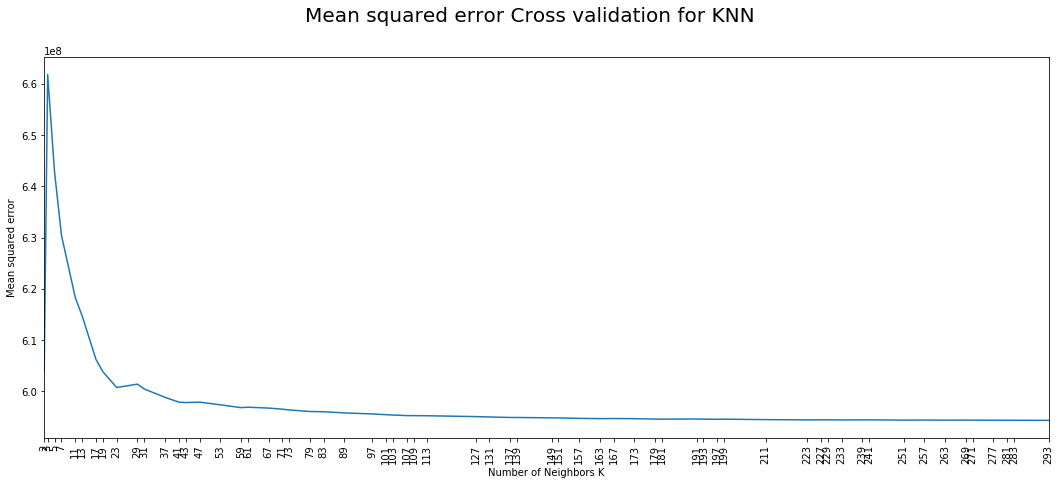

In [53]:
# Invierto los signos para poder graficar
y = [-x for x in cvScores]

# Obtengo mejor k
kOptimo = kValues[y.index(min(y))]
print "El K óptimo es %d" % kOptimo

# Plot
plt.figure().suptitle('Mean squared error Cross validation for KNN', fontsize=20)
plt.plot(kValues, y)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Mean squared error')
plt.xlim(kValues[0], kValues[-1])
plt.xticks(kValues, kValues, rotation='vertical')
plt.gcf().set_size_inches(18, 7, forward=True)
plt.show()